In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('car_details_ford_focus.csv')

In [24]:
# Exploratory Data Analysis

# Preliminary step in data analysis to :
# - Summarize main characteristics of the data
# - Gain better understanding of the date set
# - Uncover relationships between variables
# - Extract important variables

# Question

# - What are the characteristics that have the most impact on the car price?

# Learn

# - Descriptive Statistics : Basic features of dataset
# - GroupBy
# - ANOVA : analysis of Variance
# - Correlation
# - Correlation - Statistics

In [25]:
# Descriptive Statistics

# - Describe basic features of data
# - Giving short summaries about sample and measures of the data

df.describe() # computes basic statistics for all numerical variables. NaN skipped

,id,year,km,hp,cc,price
count,8.270000e+02,827.000000,827.000000,827.000000,827.000000,827.000000
mean,7.806542e+08,2011.243047,151.861325,107.729141,1562.443773,81.666496
std,1.819330e+07,4.954044,74.447653,11.418271,71.577606,31.140675
min,5.427586e+08,1999.000000,7.800000,88.000000,999.000000,25.000000
25%,7.841934e+08,2008.000000,93.269000,95.000000,1560.000000,53.500000
50%,7.845501e+08,2012.000000,147.000000,110.000000,1560.000000,81.000000
75%,7.848526e+08,2015.000000,195.000000,120.000000,1596.000000,107.000000
max,7.849938e+08,2019.000000,582.000000,138.000000,2750.000000,198.750000


In [26]:
df['fuel'].value_counts()

dizel           564
benzin & lpg    208
benzin           55
Name: fuel, dtype: int64

In [27]:
# Box plots 

# to see Median, Upper Quartile(75%), Lower Quartile(25%), data between them is Interquartile range(50%).
# Lower and Upper Extrems : 1.5 times 50% above 75% and 1.5 times below 25%.
# Outliers : Individual dots that occur outside the upper and lower extremes
# Shows the distribution and skewness of the data
# Easy to compare between groups

In [28]:
# Scatter Plot

# Each observation represented as a point
# Show the relationship between two variables
# - Predictor/independent variables on x-axis (year)
# - Target/dependent variables on y-axis (price)


Text(0, 0.5, 'Price')

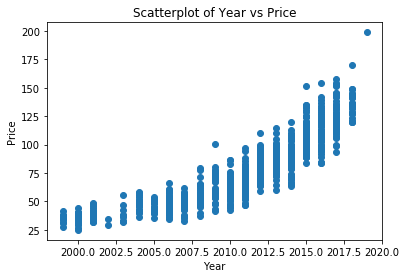

In [29]:
%matplotlib inline

x = df['year']
y = df['price']
plt.scatter(x,y)

plt.title("Scatterplot of Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")


In [30]:
# GroupBy

# can be applied on categorical variables
# group data into categories
# signle or multiple variables

In [39]:
df_test = df[['transmission', 'fuel', 'price']]
df_grp = df_test.groupby(['transmission', 'fuel'], as_index=False).mean()
df_grp

,transmission,fuel,price
0,manuel,benzin,90.258927
1,manuel,benzin & lpg,57.484076
2,manuel,dizel,80.674336
3,otomatik,benzin & lpg,52.795714
4,otomatik,dizel,131.677778
5,yarı otomatik,benzin,104.214286
6,yarı otomatik,benzin & lpg,94.253125
7,yarı otomatik,dizel,114.327000


In [41]:
# Pivot
# One variable displayed along the columns and the other variable dispalyed along the rows
df_pivot = df_grp.pivot(index='transmission', columns='fuel')
df_pivot

price                         
fuel               benzin benzin & lpg       dizel
transmission                                      
manuel          90.258927    57.484076   80.674336
otomatik              NaN    52.795714  131.677778
yarı otomatik  104.214286    94.253125  114.327000

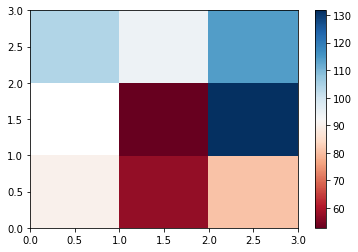

In [43]:
# Heatmap
# Plot target variable over multiple variables
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [44]:
# Correlation
# Measures to what extent different variables are interdependent.
# Lung cancer -> Smoking
# Rain -> Umbrella
# doesn't imply causation

(0, 208.2110740722494)

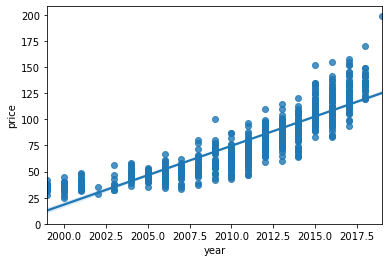

In [52]:
# Correlation between two features (year - price)
# Positive Linear Relationship impact price
sns.regplot(x='year', y='price', data=df)
plt.ylim(0,)

(0, 212.20006484359993)

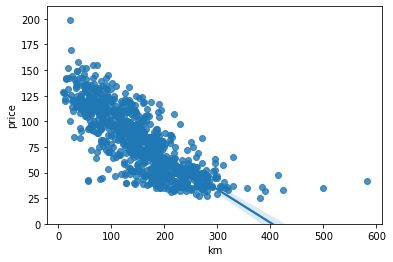

In [57]:
# Negative Linear Relationship, still impact price
sns.regplot(x='km', y='price', data=df)
plt.ylim(0,)

(0, 207.45419426048568)

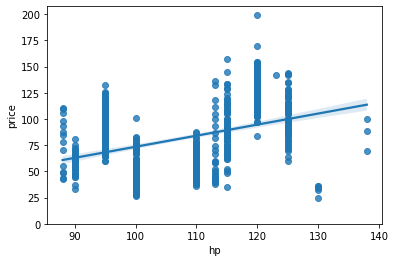

In [82]:
# Weak Correlation, curve could be a little less and wouldn't impact price so much
sns.regplot(x='hp', y='price', data=df)
plt.ylim(0,)

In [59]:
# Corelation - Statistics
# Pearson Correlation
# - Measure the strength of the correlation between two features
# -- Correlation coefficient
# -- P-value

# Correlation Coefficient
# - Close to +1 : Large Positive Relationship
# - Close to -1 : Large Negative Relationship
# - Close to 0 : No relationship

# P-value
# - p-value < 0.001 Strong certainty in the result
# - p-value < 0.05 Moderate certainty in the result
# - p-value < 0.1 Weak certainty in the result
# - p-value > 0.1 No certainty in the result


In [68]:
pearson_coef, p_value = stats.pearsonr(df['year'], df['price'])
print("Pearson Correlation : " + str(pearson_coef))
print("P-value : " + str(p_value))

Pearson Correlation : 0.8941530265780823
P-value : 4.0328263836404793e-290


In [69]:
pearson_coef, p_value = stats.pearsonr(df['km'], df['price'])
print("Pearson Correlation : " + str(pearson_coef))
print("P-value : " + str(p_value))

Pearson Correlation : -0.7761427203308013
P-value : 2.1185578025950324e-167


In [72]:
pearson_coef, p_value = stats.pearsonr(df['hp'], df['price'])
print("Pearson Correlation : " + str(pearson_coef))
print("P-value : " + str(p_value))

Pearson Correlation : 0.38723924947486965
P-value : 5.592760631473971e-31


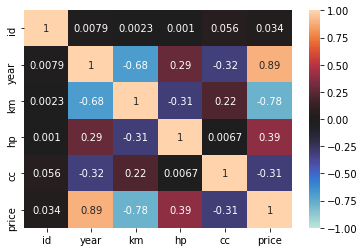

In [73]:
# Correlation Heatmap 

sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [76]:
# Analysis of Variance (ANOVA)
# Statistical comparison of groups
# Example : Average price of different vehicle makes.
# ANOVA is finding correlation between different groups of a categorical variable.
# - F-test score: variation between sample group means divided by variation within sample group
# - P-value : confidence degree

# Small F imply poor correlation between variable categories and target variable. Large F imply strong correlation.

df_anova = df[['city', 'price']]
grouped_anova = df_anova.groupby(['city'])
anova_results_1 = stats.f_oneway(grouped_anova.get_group("İstanbul")["price"], grouped_anova.get_group("Ankara")["price"])
anova_results_1

F_onewayResult(statistic=17.487160850306793, pvalue=4.225764098203329e-05)

In [75]:
anova_results_2 = stats.f_oneway(grouped_anova.get_group("İstanbul")["price"], grouped_anova.get_group("Niğde")["price"])
anova_results_2

F_onewayResult(statistic=0.6092422313640488, pvalue=0.4366769583756617)

In [77]:
df.corr()

,id,year,km,hp,cc,price
id,1.000000,0.007915,0.002330,0.001022,0.055655,0.033563
year,0.007915,1.000000,-0.682260,0.288491,-0.315526,0.894153
km,0.002330,-0.682260,1.000000,-0.308324,0.217204,-0.776143
hp,0.001022,0.288491,-0.308324,1.000000,0.006696,0.387239
cc,0.055655,-0.315526,0.217204,0.006696,1.000000,-0.308667
price,0.033563,0.894153,-0.776143,0.387239,-0.308667,1.000000


In [83]:
df[['hp','km','price']].corr()

,hp,km,price
hp,1.000000,-0.308324,0.387239
km,-0.308324,1.000000,-0.776143
price,0.387239,-0.776143,1.000000


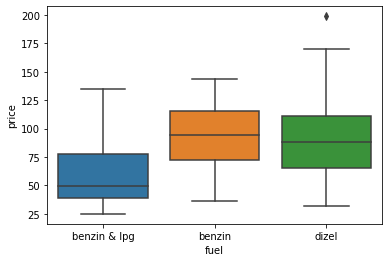

In [84]:
sns.boxplot(x='fuel', y='price', data=df)

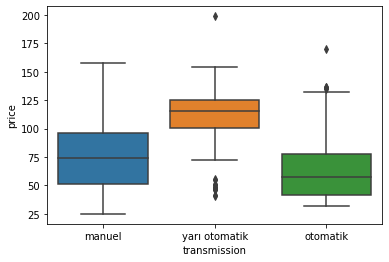

In [85]:
# If difference is too much, then good predictor.
sns.boxplot(x='transmission', y='price', data=df)

In [86]:
fuel_counts = df['fuel'].value_counts().to_frame() # change results to frame
fuel_counts.rename(columns={'fuel':'value_counts'})
fuel_counts.index.name = 'fuel'
fuel_counts
#Benzin wouldn't be a good predictor because of count

,fuel
fuel,
dizel,564
benzin & lpg,208
benzin,55


In [87]:
df['city'].unique()

array(['Niğde', 'İstanbul', 'Ankara', 'Manisa', 'Zonguldak', 'Antalya',
       'Denizli', 'Konya', 'Eskişehir', 'Adıyaman', 'İzmir', 'Ağrı',
       'Balıkesir', 'Aksaray', 'Elazığ', 'Kahramanmaraş', 'Malatya',
       'Sakarya', 'Gaziantep', 'Bursa', 'Diyarbakır', 'Hatay', 'Bitlis',
       'Nevşehir', 'Tokat', 'Mersin', 'Samsun', 'Afyonkarahisar', 'Adana',
       'Kırşehir', 'Tekirdağ', 'Hakkari', 'Kayseri', 'Osmaniye',
       'Giresun', 'Kütahya', 'Rize', 'Mardin', 'Burdur', 'Van', 'Bingöl',
       'Isparta', 'Batman', 'Kırıkkale', 'Bolu', 'Trabzon', 'Kocaeli',
       'Ordu', 'Şanlıurfa', 'Erzurum', 'Kastamonu', 'Yozgat', 'Düzce',
       'Kilis', 'Karabük', 'Siirt', 'Uşak', 'Muğla', 'Sinop', 'Muş',
       'Sivas', 'Aydın', 'Bartın', 'Ardahan', 'Karaman', 'Çorum',
       'Bilecik', 'Amasya', 'Yalova', 'Iğdır', 'Erzincan', 'Çanakkale'],
      dtype=object)

In [90]:
df_group = df[['city','fuel','price']]
df_group1 = df_group.groupby(['city'],as_index=True).mean()
df_group1

,price
city,
Adana,76.842553
Adıyaman,90.000000
Afyonkarahisar,65.500000
Aksaray,77.464706
Amasya,118.500000
...,...
Çanakkale,71.500000
Çorum,57.312500
İstanbul,88.575000


In [91]:
df_group2 = df_group.groupby(['fuel'],as_index=True).mean()
df_group2

,price
fuel,
benzin,93.811200
benzin & lpg,59.523558
dizel,88.648362
